In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Loading fashion_mnist dataset
fashion_mnist = keras.datasets.fashion_mnist
(x_train,y_train) , (x_test,y_test)=fashion_mnist.load_data()

In [3]:
#training data shape
x_train.shape

(60000, 28, 28)

In [4]:
#output data shape
y_train.shape

(60000,)

In [5]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [6]:
#first index of training data 
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

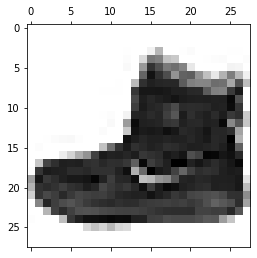

In [42]:

#plotting the first index of training data
plt.matshow(x_train[0],cmap=plt.cm.binary)

In [24]:
#checking output data
y_train[0]

9

#### As the output data is an array of integer values, we need to label the class with suitable names of the item respectively

In [25]:
#labeling class names in output
class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [40]:
#function to plot image of single item 
def plot_sample(x,y,index):
  plt.figure(figsize=(10,4))
  plt.matshow(x[index],cmap=plt.cm.binary)
  plt.xlabel(class_names[y[index]],fontsize=16)

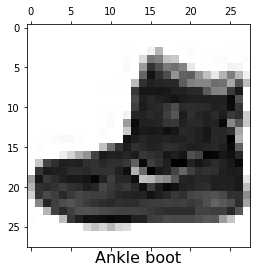

In [39]:
# plotting image from training data
plot_sample(x_train,y_train,0)

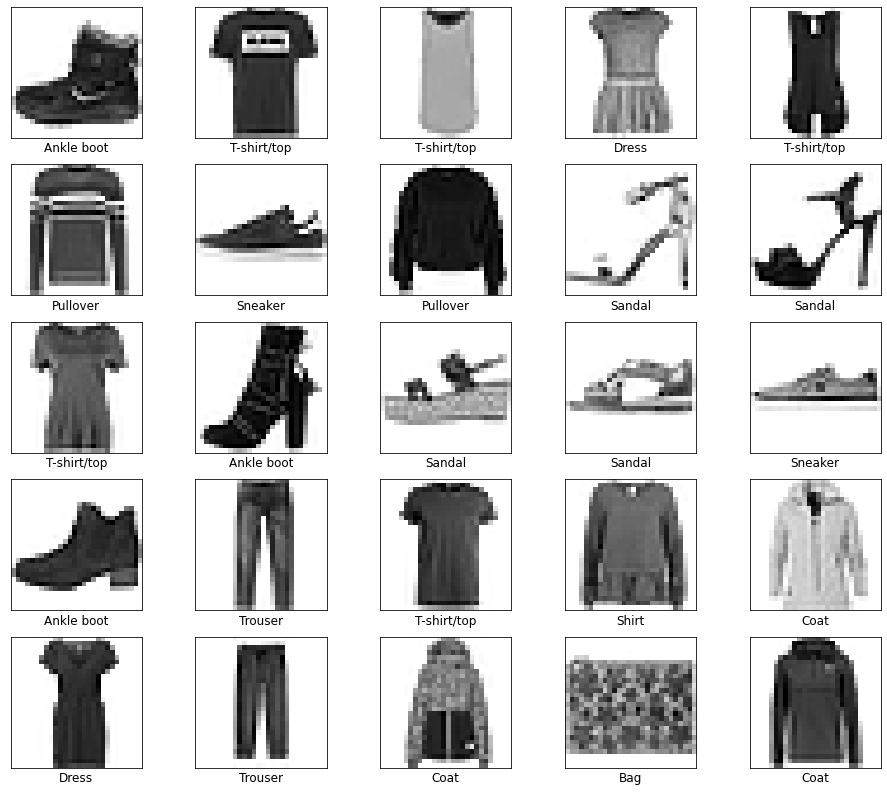

In [45]:
#plotting training data 
plt.figure(figsize=(16,14))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]],fontsize=12)
plt.show()

In [ ]:
#scaling values between 0 to 1
x_train=x_train/255.0
x_test=x_test/255.0

In [ ]:
#setting up layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [ ]:
#compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
#fitting the model
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4972 - accuracy: 0.8249
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3715 - accuracy: 0.8665
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3354 - accuracy: 0.8781
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3124 - accuracy: 0.8850
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2947 - accuracy: 0.8921
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2808 - accuracy: 0.8971
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2676 - accuracy: 0.9007
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2580 - accuracy: 0.9042
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2475 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.238

In [ ]:
#evaluating accuracy
loss, accuracy = model.evaluate(x_test,  y_test)
print('\nTest accuracy: ',accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.3442 - accuracy: 0.8807

Test accuracy:  0.8806999921798706


In [ ]:
#predicting the testing values
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
y_pred = probability_model.predict(x_test)

In [ ]:
#all predicted values in form of an array
y_pred

array([[5.59847820e-07, 5.14204750e-08, 1.04653299e-08, ...,
        9.43194889e-03, 8.02726632e-08, 9.86767828e-01],
       [2.48369588e-06, 4.80793392e-15, 9.95699406e-01, ...,
        2.81010493e-17, 9.88303883e-11, 1.50142519e-15],
       [5.52451196e-10, 1.00000000e+00, 5.37284713e-12, ...,
        1.17678375e-29, 5.19166890e-14, 1.75917830e-21],
       ...,
       [3.87334097e-07, 2.55073631e-13, 4.61145532e-07, ...,
        3.00237526e-12, 9.99998808e-01, 5.05312006e-14],
       [8.97912855e-10, 9.99999762e-01, 2.75777928e-10, ...,
        1.18703888e-13, 6.05212339e-11, 3.87633366e-13],
       [6.73465820e-07, 9.09786806e-08, 2.49939433e-07, ...,
        7.34109723e-04, 3.20540625e-04, 1.98283260e-06]], dtype=float32)

### Plotting an item randomly to check our predictions

In [ ]:
#function for plotting predicted image
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [ ]:
x_test.shape

(10000, 28, 28)

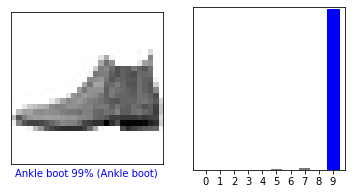

In [ ]:
#plotting image from training data and predicting image
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, y_pred[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, y_pred[i],  y_test)
plt.show()

In [ ]:
#The item is predicted to be at the 9th index of the output array
y_class_names=[np.argmax(i) for i in y_pred]
y_class_names[0]                              

9

### Thus, this prediction is correct

In [ ]:
#Checking the label name
class_names[y_class_names[0]]

'Ankle boot'

### Predicting first 25 items

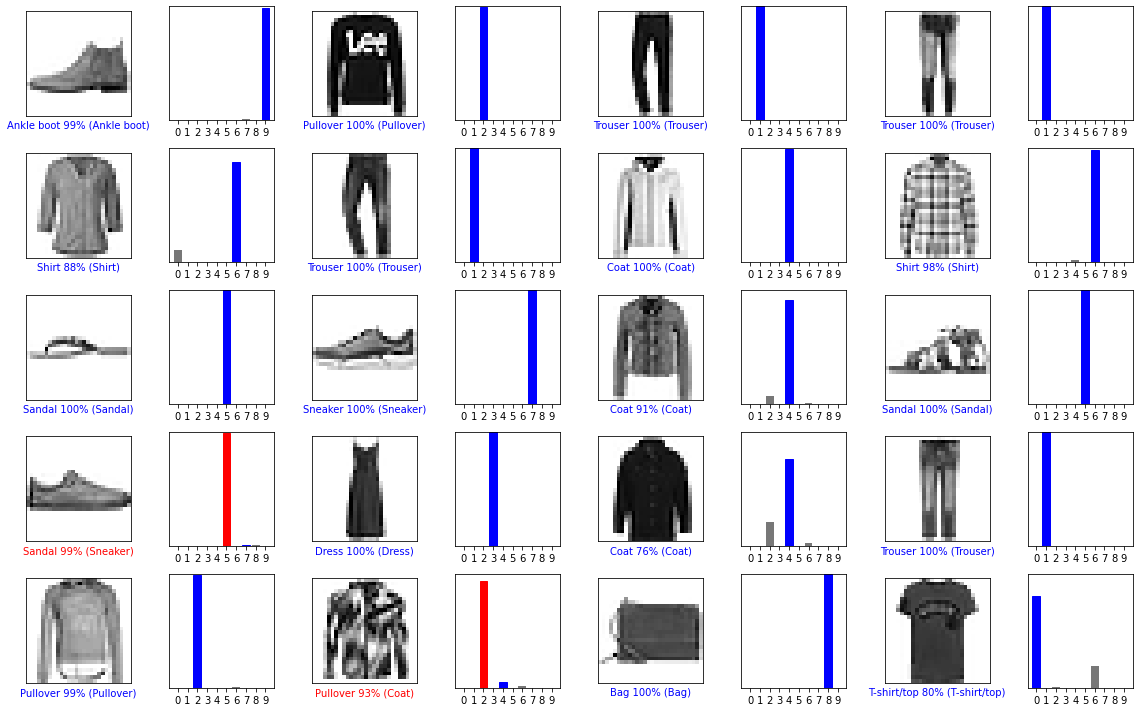

In [ ]:
# The first X test images, their predicted labels, and the true labels.
# Correct predictions are in blue and incorrect predictions in red.
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, y_pred[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, y_pred[i], y_test)
plt.tight_layout()
plt.show()

### Items predicted at indexes respectively

In [ ]:
for i in range(25):
  print(y_class_names[i])

9
2
1
1
6
1
4
6
5
7
4
5
5
3
4
1
2
2
8
0
2
5
7
5
1


### Out of 25 predictions we got 23 correct ones... with 88% accuracy

In [ ]:
#checking label names
for i in range(25):
  print(class_names[y_class_names[i]])

Ankle boot
Pullover
Trouser
Trouser
Shirt
Trouser
Coat
Shirt
Sandal
Sneaker
Coat
Sandal
Sandal
Dress
Coat
Trouser
Pullover
Pullover
Bag
T-shirt/top
Pullover
Sandal
Sneaker
Sandal
Trouser


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
#classification report
print('\n Classification Report: \n',classification_report(y_test,y_class_names))


 Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.84      0.85      1000
           1       0.97      0.98      0.98      1000
           2       0.82      0.80      0.81      1000
           3       0.86      0.90      0.88      1000
           4       0.79      0.83      0.81      1000
           5       0.98      0.96      0.97      1000
           6       0.73      0.70      0.72      1000
           7       0.92      0.98      0.95      1000
           8       0.98      0.97      0.98      1000
           9       0.97      0.94      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [ ]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_class_names)

Text(69.0, 0.5, 'Truth')

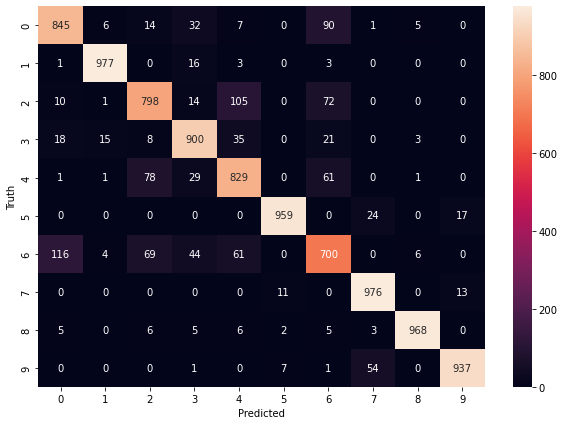

In [ ]:
#confusion matrix
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')